In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
human_resources = pd.read_csv('Human_Resources.csv')
human_resources.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
human_resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
human_resources.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'], axis=1, inplace=True)

In [5]:
# Replace 'Attrition' , 'OverTime' , 'gender' column with integers before performing any visualizations 
human_resources['Attrition'] = human_resources['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
human_resources['OverTime'] = human_resources['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

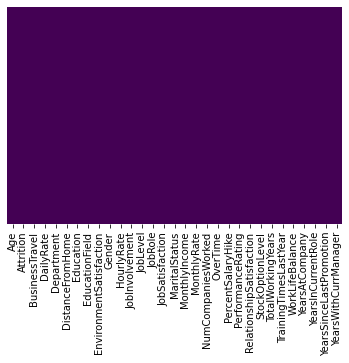

In [6]:
# See if we have any missing data!
sns.heatmap(human_resources.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243C603A970>,
      dtype=object)

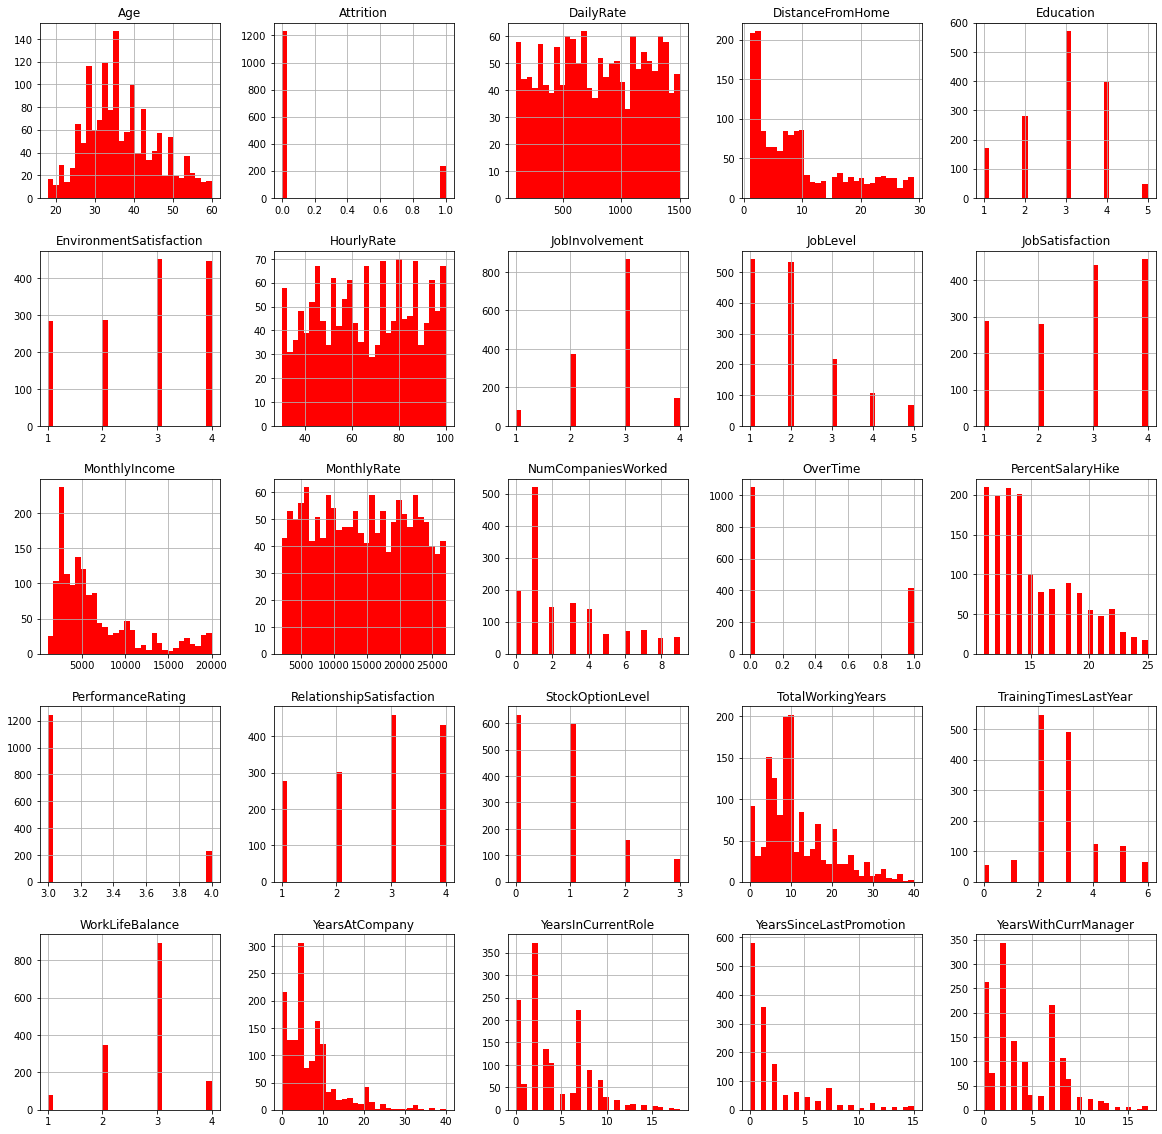

In [7]:
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
human_resources.hist(bins=30,
                     figsize=(20,20),
                     color='r')

In [8]:
# Let's see how many employees left the company! 
employees_left = human_resources[human_resources.Attrition == 1]
employees_stayed = human_resources[human_resources.Attrition == 0]

In [9]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 
print('Number of employees who stayed =',len(employees_stayed))
print('% of employees who stayed =', round(len(employees_stayed)/len(human_resources) * 100, 2),'% \n')

print('Number of employees who left =',len(employees_left))
print('% of employees who left =', round(len(employees_left)/len(human_resources) * 100, 2),'%')

Number of employees who stayed = 1233
% of employees who stayed = 83.88 % 

Number of employees who left = 237
% of employees who left = 16.12 %


In [10]:
employees_left.describe()

#  Compare the mean and std of the employees who stayed and left 
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [11]:
employees_stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [12]:
pd.pivot_table(human_resources, index='JobRole', values='Attrition')

,Attrition
JobRole,
Healthcare Representative,0.068702
Human Resources,0.230769
Laboratory Technician,0.239382
Manager,0.049020
Manufacturing Director,0.068966
Research Director,0.025000
Research Scientist,0.160959
Sales Executive,0.174847
Sales Representative,0.397590


In [13]:
pd.pivot_table(human_resources, index='JobLevel', values='Attrition')

,Attrition
JobLevel,
1,0.263352
2,0.097378
3,0.146789
4,0.047170
5,0.072464


In [14]:
pd.pivot_table(human_resources, index=['JobRole','JobLevel'], values='Attrition')

Attrition
JobRole                   JobLevel           
Healthcare Representative 2          0.038462
                          3          0.113636
                          4          0.111111
Human Resources           1          0.303030
                          2          0.000000
                          3          0.333333
Laboratory Technician     1          0.280000
                          2          0.089286
                          3          0.333333
Manager                   3          0.166667
                          4          0.000000
                          5          0.069767
Manufacturing Director    2          0.055556
                          3          0.111111
                          4          0.000000
Research Director         3          0.000000
                          4          0.000000
                          5          0.076923
Research Scientist        1          0.192308
                          2          0.035088
                          3          0.000000
Sales Executive           2          0.154506
                          3          0.215190
                          4          0.285714
Sales Representative      1          0.421053
                          2          0.142857

In [15]:
pd.pivot_table(human_resources, index=['JobRole','Education'], values='Attrition')

Attrition
JobRole                   Education           
Healthcare Representative 1           0.133333
                          2           0.142857
                          3           0.062500
                          4           0.022727
                          5           0.000000
Human Resources           1           0.200000
                          2           0.250000
                          3           0.181818
                          4           0.300000
                          5           0.333333
Laboratory Technician     1           0.228571
                          2           0.210526
                          3           0.298077
                          4           0.189655
                          5           0.000000
Manager                   1           0.222222
                          2           0.000000
                          3           0.050000
                          4           0.034483
                          5           0.000000
Manufacturing Director    1           0.066667
                          2           0.030303
                          3           0.037037
                          4           0.105263
                          5           0.400000
Research Director         1           0.000000
                          2           0.000000
                          3           0.033333
                          4           0.043478
                          5           0.000000
Research Scientist        1           0.189189
                          2           0.152174
                          3           0.147541
                          4           0.177215
                          5           0.125000
Sales Executive           1           0.111111
                          2           0.166667
                          3           0.183333
                          4           0.198020
                          5           0.083333
Sales Representative      1           0.350000
                          2           0.466667
                          3           0.500000
                          4           0.187500

In [16]:
human_resources.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [17]:
df_pivots = human_resources[['Department','Education','MaritalStatus','Gender','JobSatisfaction','JobInvolvement','RelationshipSatisfaction','Attrition']]

In [18]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values ='Attrition').sort_values('Attrition', ascending = False))

Department
                        Attrition
Department                       
Sales                    0.206278
Human Resources          0.190476
Research & Development   0.138398
Education
           Attrition
Education           
1           0.182353
3           0.173077
2           0.156028
4           0.145729
5           0.104167
MaritalStatus
               Attrition
MaritalStatus           
Single          0.255319
Married         0.124814
Divorced        0.100917
Gender
        Attrition
Gender           
Male     0.170068
Female   0.147959
JobSatisfaction
                 Attrition
JobSatisfaction           
1                 0.228374
3                 0.165158
2                 0.164286
4                 0.113290
JobInvolvement
                Attrition
JobInvolvement           
1                0.337349
2                0.189333
3                0.144009
4                0.090278
RelationshipSatisfaction
                          Attrition
RelationshipSatisfaction          

ValueError: Grouper for 'Attrition' not 1-dimensional

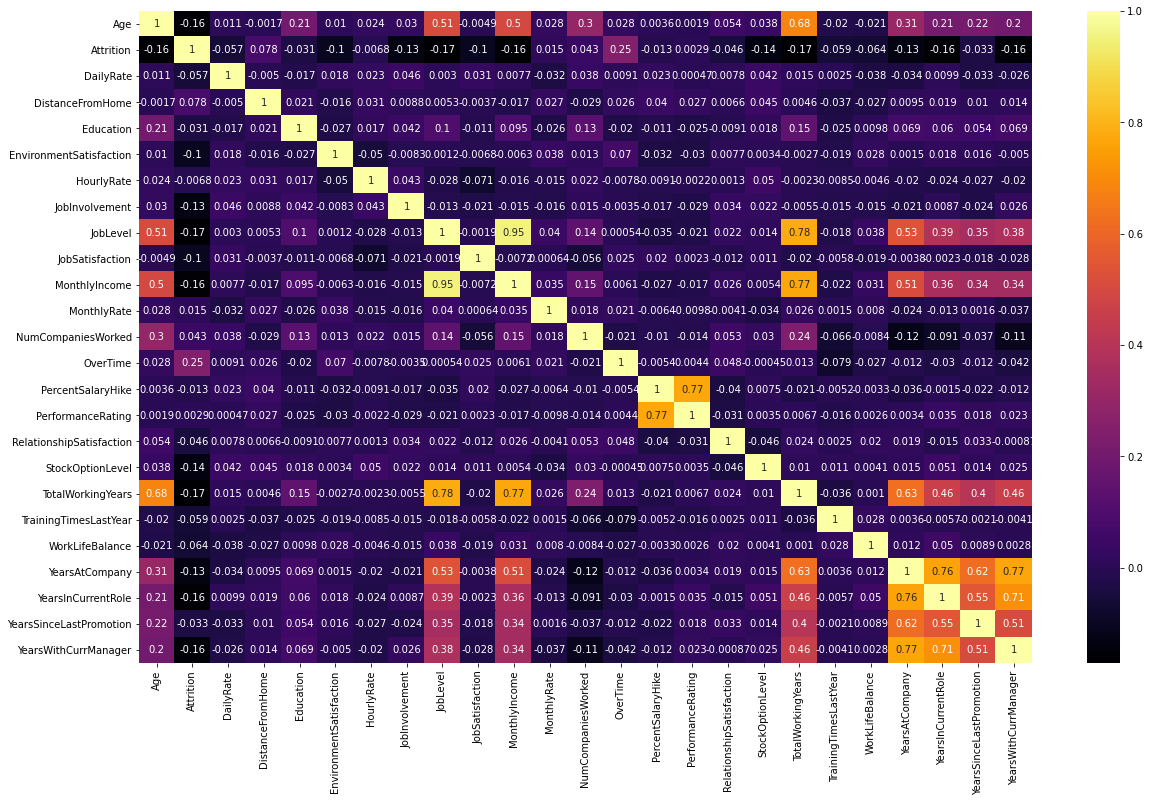

In [63]:
correlation = human_resources.corr()

plt.figure(figsize=(20,12))
sns.heatmap(correlation,
            annot=True, 
            cmap="inferno")
# Job level is strongly correlated with total working years
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is correlated with monthly income

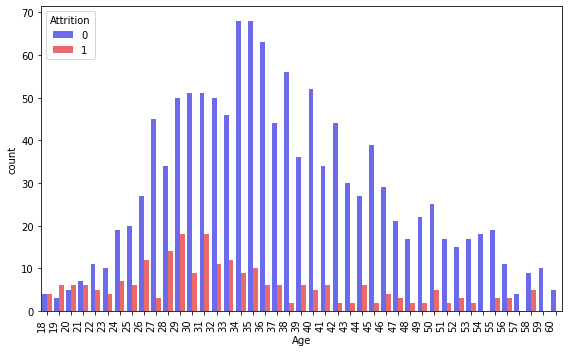

In [51]:
#It seems that younger employees tend more to quit than older ones
# To be sure must see KDE
plt.figure(figsize=[8, 5])

ax = sns.countplot(x = 'Age', hue = 'Attrition', data = human_resources, palette='seismic')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

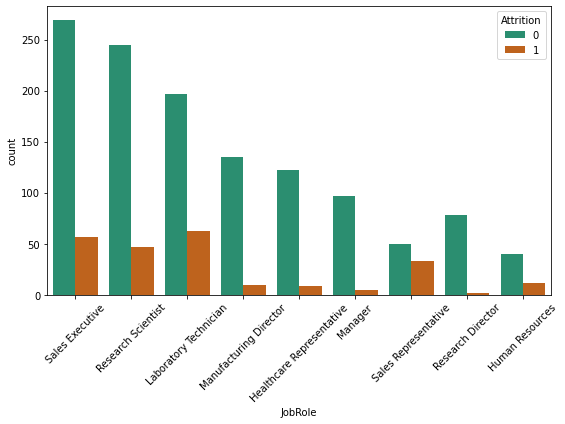

In [57]:
plt.figure(figsize=[8, 6])
ax = sns.countplot(x = 'JobRole', hue = 'Attrition', data = human_resources, palette='Dark2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

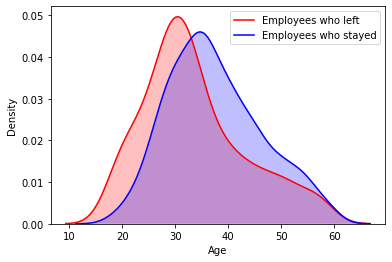

In [22]:
# As suspected, the KDE shows that employees younger than 33 years quit more often
plt.xlabel('Age')
plt.ylabel('Density')
sns.kdeplot(employees_left.Age, label='Employees who left', shade=True, color='r',)
sns.kdeplot(employees_stayed.Age, label='Employees who stayed', shade=True, color='b')

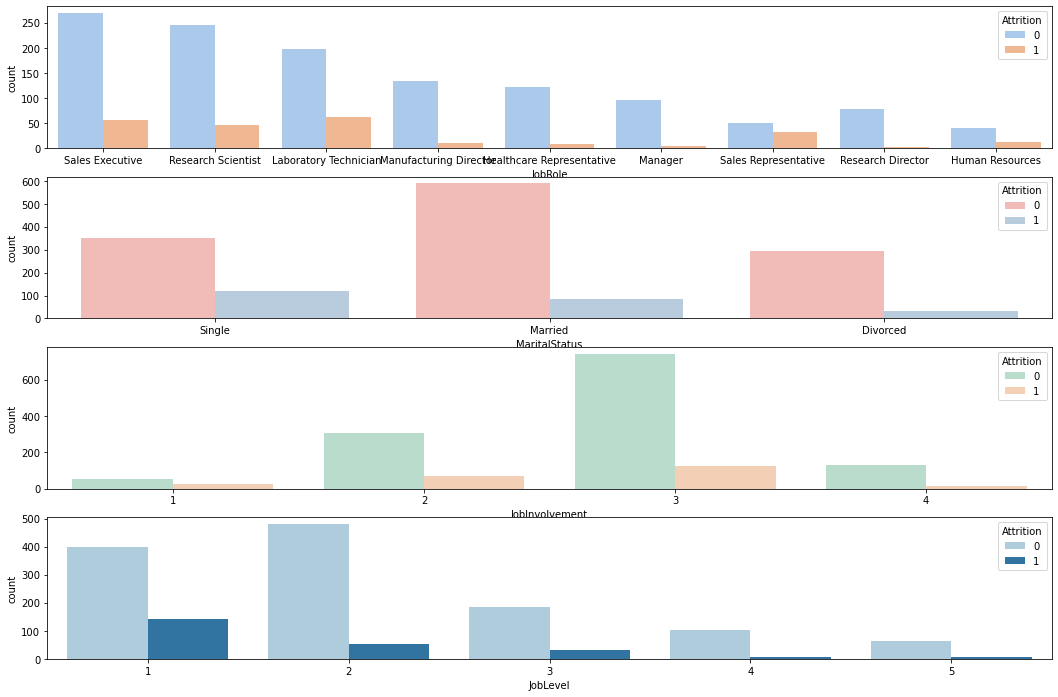

In [56]:
plt.figure(figsize=(18,12))
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = human_resources, palette='pastel')
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = human_resources, palette='Pastel1')
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = human_resources, palette='Pastel2')
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = human_resources, palette='Paired')

# Single employees tend to leave more compared to married and divorced
# Sales Representitives & Laboratory Tecnician tend to leave more compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 

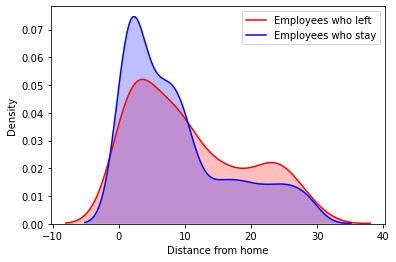

In [24]:
#Employees who live closer tend to remain in the company
#The density changes at approximately 10
#plt.figure(figsize=(4,3))

#plt.title('Density of quit t')
plt.xlabel('Distance from home')
plt.ylabel('Density')
sns.kdeplot(employees_left.DistanceFromHome, label='Employees who left', shade=True, color='r')
sns.kdeplot(employees_stayed.DistanceFromHome, label='Employees who stay', shade=True, color='b')

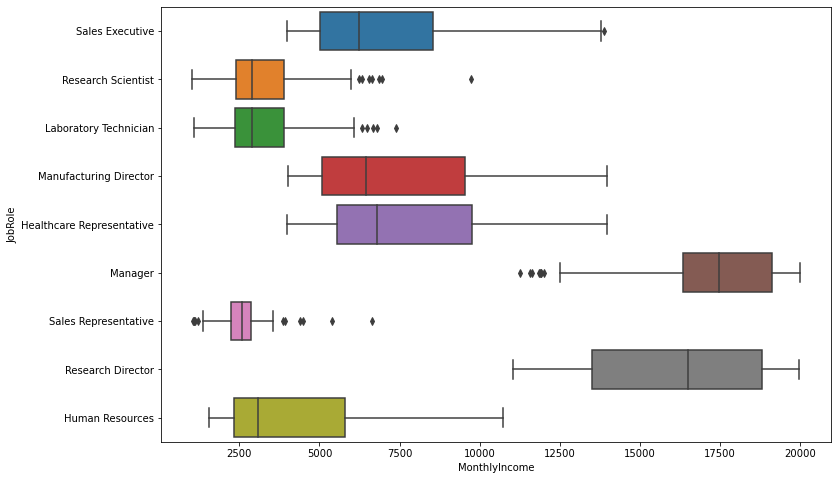

In [25]:
# Sales Representative & Laboratory Technician are bewteen the lowest payments
plt.figure(figsize=(12,8))

sns.boxplot(x='MonthlyIncome',
            y='JobRole',
            data=human_resources)

In [26]:
# To a better result the data must be converted to full Integer
# BusinessTravel, Department, EducationField, JobRole, MaritalStatus must become integers
human_resources.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7


In [27]:
human_resources.to_csv('eda_data.csv')